In [1]:
from scipy.stats import beta
import numpy as np

In [2]:
#SAMPLING
def bestSeller(sizeOfSample, review1, review2):
    
    # create the beta samples
    beta1_samples = np.array(beta.rvs(review1[0], review1[1], size=sizeOfSample))
    beta2_samples = np.array(beta.rvs(review2[0], review2[1], size=sizeOfSample))
    
    #count all true values and divide samplesize
    return np.sum(beta1_samples > beta2_samples)/sizeOfSample

In [3]:
print(bestSeller(1000000, (91, 11), (3, 1)))

0.712626


In [4]:
# function from slides
H = lambda t1,t2: beta.pdf(t1, 91, 11)*np.sum(beta.pdf(t2, 3, 1), axis=1)

In [5]:
#NUMERICAL INTEGRATION
def bestSeller(sizeOfSample, H):
    
    #create äquisdant points beetween 0 and 1
    aq_points = np.linspace(0,1, sizeOfSample)
    
    #create matrix with sum of rows are teta1 > teta2
    X = np.tril(aq_points)[1:]
    
    #create the factor (b-a)/N
    b = 1/(np.arange(1,sizeOfSample)*sizeOfSample)*aq_points[1:]
    
    # calculate the numeric integral
    return H(aq_points[1:], X)@b

In [6]:
print(bestSeller(10000, H))

0.7126410809889292


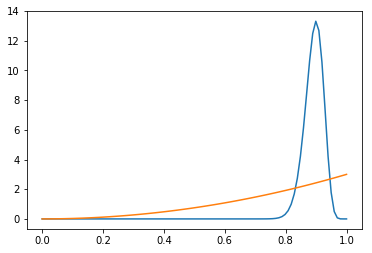

In [8]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)

plt.plot(x, beta.pdf(x, 91, 11))
plt.plot(x, beta.pdf(x, 3, 1))
plt.show();